In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
import seaborn as sns
from scipy import stats

### Review of data overall

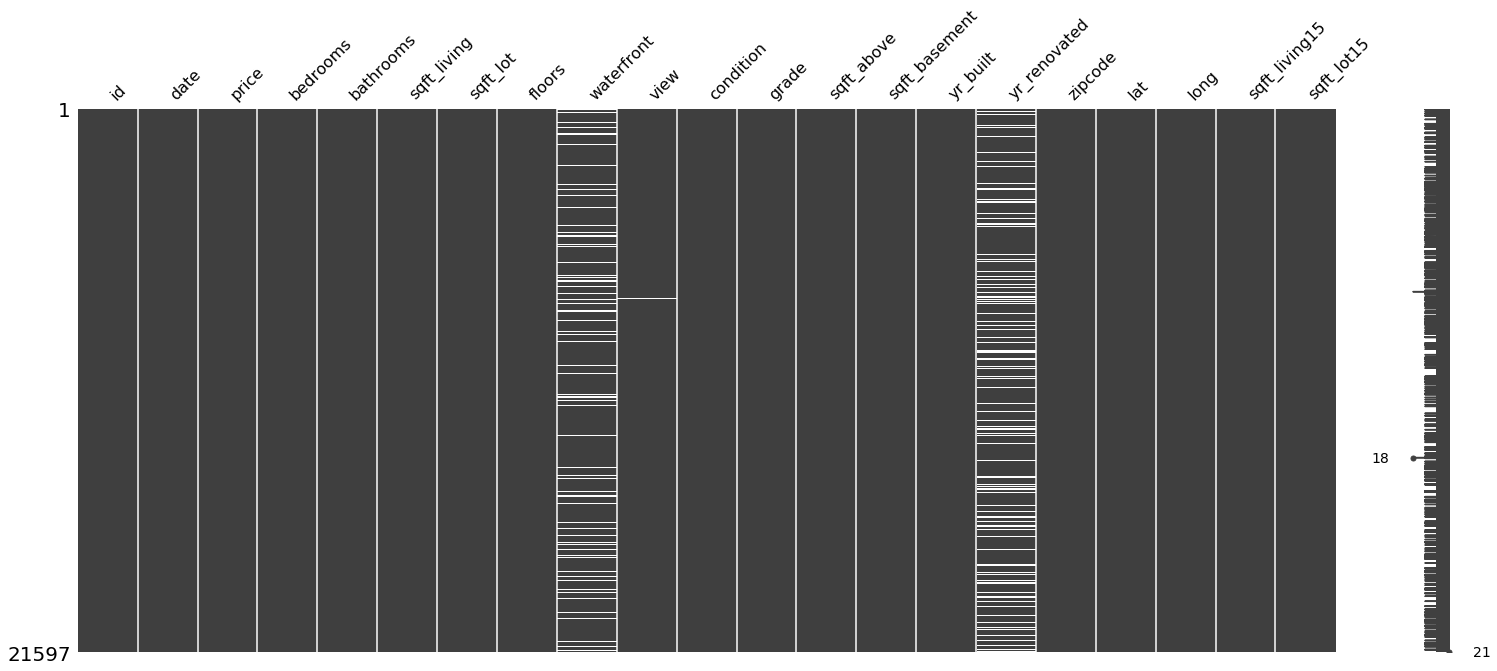

In [7]:
kc_csv = pd.read_csv('./data/kc_house_data.csv')
kcdf = pd.DataFrame(kc_csv)
msno.matrix(kcdf)

### Review the values of each column to discover any oddities.

In [8]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
for column in kcdf:
   print(kcdf[column].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/27/2015      1
11/2/2014      1
2/15/2015      1
5/24/2015      1
8/30/2014      1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.

Based on the results above, we can see that the ```sqft_basement``` has irregular values; in this case '?'s.

In [10]:
max_beds = kcdf.bedrooms.max()
kcdf[kcdf.bedrooms == max_beds]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [11]:
# id of house with 13540 sqft_living
# kcdf[kcdf.id == 1225069038]
max_sqft_living = kcdf.sqft_living.max()
kcdf[kcdf.sqft_living == max_sqft_living]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [12]:
# id of house with 33 bathrooms reset to 3 (likely a mistype)
# kcdf.loc[kcdf.id == 2402100895,'bedrooms'] = 3
max_bath = kcdf.bathrooms.max()
kcdf[kcdf.bathrooms == max_bath]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


### Review percentage of missing values

In [7]:
total_values = kcdf.shape[0]
for column in kcdf:
    missing_values = kcdf[column].isna().sum()
    perc = missing_values/total_values * 100
    if missing_values > 0:
        print("The {} column is missing {}, which accounts for {}% of the data".format(column, missing_values, perc.round(2)))

The waterfront column is missing 2376, which accounts for 11.0% of the data
The view column is missing 63, which accounts for 0.29% of the data
The yr_renovated column is missing 3842, which accounts for 17.79% of the data
